In [22]:
using CommonDataFormat
using Dates, CSV, DataFrames
using Statistics
using CairoMakie
include("../../src/scripts/MAVEN_load.jl")
include("../../src/scripts/MAVEN_plot.jl")
include("../../src/scripts/MAVEN_SWIA.jl")
include("../../src/scripts/MAVEN_STATIC.jl")
using .MAVEN_load
using .MAVEN_plot
using .MAVEN_SWIA
using .MAVEN_STATIC

In [ ]:
project_root = dirname(@__DIR__)

In [33]:
yyyy = 2022
mm = 08
dd = 24
hh = 07
mi = 30
ss = 30

time_stemp = [
    DateTime(yyyy, mm, dd, hh, mi, ss),
    DateTime(yyyy, mm, dd, hh, mi+1, ss),
    DateTime(yyyy, mm, dd, hh, mi+2, ss),  
    DateTime(yyyy, mm, dd, hh, mi+3, ss),
];

date_str = Dates.format.(time_stemp[1], "yyyymmdd")
date_str_dye = "$(year(time_stemp[1]))$(lpad(dayofyear(time_stemp[1]), 3, '0'))"

save_name = "MAVEN_SWIA_Ion_VDF_2D_$(replace(string(time_stemp[1]), ":" => "-")).png"
save_path = joinpath(pwd(), "results", "IonBeam", save_name)
data_path = joinpath(pwd(), "..", "..", "Data", "MAVEN", "mvn_swi_l2_coarsesvy3d_$(date_str)_v02_r01.cdf")
quat_path = joinpath(pwd(), "Data", "MAVEN", "mvn_spice_swia_qu_$(date_str).csv")
mag_path = joinpath(pwd(), "Data", "MAVEN", "mvn_mag_l3_$(date_str_dye)ss1s_$(date_str)_v01_r01.f77_unformatted")

"e:\\WorkSpace\\Tianwen\\project\\IonBeam\\Data\\MAVEN\\mvn_mag_l3_2022236ss1s_20220824_v01_r01.f77_unformatted"

In [34]:
swi_data = CDFDataset(data_path)

CDFDataset{CommonDataFormat.NoCompression, Int64}
path: e:\WorkSpace\Tianwen\project\IonBeam\..\..\Data\MAVEN\mvn_swi_l2_coarsesvy3d_20220824_v02_r01.cdf
variables:
  epoch : (10800,) support_data CDF_TIME_TT2000 [2022-08-24T00:00:07.103 … 2022-08-24T23:59:58.631]
  time_met : (10800,) support_data CDF_DOUBLE [7.145709789526978e8 … 7.146573703287201e8]
  time_unix : (10800,) support_data CDF_DOUBLE [1.6612992071038716e9 … 1.6613855986316302e9]
  atten_state : (10800,) support_data CDF_UINT1 [1 … 1]
  grouping : (10800,) support_data CDF_UINT1 [1 … 1]
  num_accum : (10800,) support_data CDF_INT2 [1 … 1]
  counts : (16, 4, 48, 10800) support_data CDF_FLOAT [0.0 … 2.5]
  diff_en_fluxes : (16, 4, 48, 10800) data CDF_FLOAT [0.0 … 550045.2]
  geom_factor : (1,) support_data CDF_FLOAT [0.0039199996 … 0.0039199996]
  de_over_e_coarse : (1,) support_data CDF_FLOAT [0.15 … 0.15]
  accum_time_coarse : (1,) support_data CDF_FLOAT [0.0204 … 0.0204]
  energy_coarse : (48, 1) support_data CDF_FLOAT [

In [59]:
omni_file = joinpath(pwd(), "..", "..", "Data", "MAVEN", "mvn_swi_l2_coarsearc3d_20210824_v02_r00.cdf")
#omni_file = joinpath(pwd(), "../Data/MAVEN/mvn_swi_l2_finearc3d_20210824_v02_r00.cdf")
data = load_cdf(omni_file)
quat_path = joinpath(pwd(), "..", "..", "Data", "MAVEN", "mvn_spice_swia_qu_20210824.csv")
quat_data = load_quat(quat_path)
quat_data[:data_load_flag] = true
data = get_3dc!(data, quat_data = quat_data)

Dict{Symbol, Any} with 42 entries:
  :quat_mso             => QuatRotation{Float64}[[1.0 5.15357e-5 0.000176453; -…
  :geom_factor          => 0.00392
  :nphi                 => 16
  :theta_coarse         => Float32[-7.08746 -8.19045 … -33.75 -33.75; -2.36249 …
  :theta_atten_coarse   => Float32[-7.08746 -8.19045 … -33.75 -33.75; -2.36249 …
  :g_phi_atten_coarse   => Float32[0.00625, 0.028125, 0.04375, 0.0625, 0.0625, …
  :accum_time_coarse    => 0.0204
  :g_theta_atten_coarse => Float32[1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; 1.0 1.…
  :g_phi_coarse         => Float32[0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.06…
  :time_unix            => [1.62976e9, 1.62976e9, 1.62976e9, 1.62976e9, 1.62976…
  :energy_coarse        => Float32[23244.8, 20114.5, 17405.7, 15061.7, 13033.4,…
  :time_met             => [6.83035e8, 6.83035e8, 6.83035e8, 6.83035e8, 6.83035…
  :diff_en_fluxes       => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.…
  :domega               => [0.0321279 0.0323478 0.032347

In [186]:
test = CDFDataset(omni_file)

CDFDataset{CommonDataFormat.NoCompression, Int64}
path: e:\WorkSpace\Tianwen\project\IonBeam\..\..\Data\MAVEN\mvn_swi_l2_coarsearc3d_20210824_v02_r00.cdf
variables:
  epoch : (10800,) support_data CDF_TIME_TT2000 [2021-08-24T00:00:05.130 … 2021-08-24T23:59:56.446]
  time_met : (10800,) support_data CDF_DOUBLE [6.830350196092682e8 … 6.831214108486176e8]
  time_unix : (10800,) support_data CDF_DOUBLE [1.6297632051307316e9 … 1.6298495964463248e9]
  atten_state : (10800,) support_data CDF_UINT1 [1 … 1]
  grouping : (10800,) support_data CDF_UINT1 [0 … 0]
  num_accum : (10800,) support_data CDF_INT2 [1 … 1]
  counts : (16, 4, 48, 10800) support_data CDF_FLOAT [0.0 … 0.0]
  diff_en_fluxes : (16, 4, 48, 10800) data CDF_FLOAT [0.0 … 0.0]
  geom_factor : (1,) support_data CDF_FLOAT [0.0039199996 … 0.0039199996]
  de_over_e_coarse : (1,) support_data CDF_FLOAT [0.15 … 0.15]
  accum_time_coarse : (1,) support_data CDF_FLOAT [0.0204 … 0.0204]
  energy_coarse : (48, 1) support_data CDF_FLOAT [23244

In [71]:
# 找到距离目标时间最近的时间点
target_time_str = "2021-08-24T07:30:00"
target_dt = DateTime(target_time_str, dateformat"yyyy-mm-ddTHH:MM:SS")
target_val, target_idx = findmin(d -> abs(d - target_dt), data[:epoch])

vel_ion = MAVEN_SWIA.ion_energy2v.(data[:energy], 1)./1000  #能量转速度
theta = reshape(data[:theta][target_idx, :, :], 1, data[:ntheta], data[:nenergy])  
phi = reshape(data[:phi], data[:nphi], 1, 1)    
vel_ion = reshape(vel_ion, 1, 1, data[:nenergy])  

# 计算三维速度分布
vel_3d = vec(MAVEN_SWIA.sphere2xyz_for_SWIA.(vel_ion, theta, phi))
v = hcat([x[1] for x in vel_3d],[x[2] for x in vel_3d],[x[3] for x in vel_3d])
dF = vec(data[:diff_en_fluxes][target_idx, :, :, :])

3072-element Vector{Float32}:
      0.0
      0.0
      0.0
      0.0
      0.0
      0.0
      0.0
      0.0
      0.0
      0.0
      0.0
 201149.62
      0.0
      ⋮
      0.0
      0.0
      0.0
      0.0
      0.0
      0.0
 255659.1
      0.0
 255659.1
 255659.1
      0.0
      0.0

In [ ]:
_, time_ind = findmin(d -> abs(d - time_stemp[1]), swi_data[:epoch])
swi_time = swi_data[:epoch][time_ind]
_, rotation_ind = findmin(d -> abs(d - swi_time), quat_data[:epoch])
quat_data[:epoch][rotation_ind]
# _, time_b_ind = findmin(d -> abs(d - swi_time), time_b)
# position_mso[time_b_ind+1, :]
# mag_data[:epoch][time_b_ind+1]

2021-08-24T05:47:44

In [14]:
yyyy = 2021
mm = 08
dd = 24
mi = 23
ss = 30

time_stemp = [
    DateTime(yyyy, mm, dd, 07, mi, ss),
    DateTime(yyyy, mm, dd, 07, mi+1, ss),
    DateTime(yyyy, mm, dd, 07, mi+2, ss),
    DateTime(yyyy, mm, dd, 07, mi+3, ss),
];

date_str = Dates.format.(time_stemp[1], "yyyymmdd")

data_path = joinpath(pwd(), "..", "..", "Data", "MAVEN", "mvn_swi_l2_coarsearc3d_$(date_str)_v02_r00.cdf")

"e:\\WorkSpace\\Tianwen\\project\\IonBeam\\..\\..\\Data\\MAVEN\\mvn_swi_l2_coarsearc3d_20210824_v02_r00.cdf"

In [21]:
date_str_dye = "$(year(time_stemp[1]))$(lpad(dayofyear(time_stemp[1]), 3, '0'))"

"2021236"

Doing 2021-08-24T07:23:30 H+

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\USTC\.julia\packages\Makie\Vn16E\src\scenes.jl:264


┌ Warning: There were duplicate points. Only one of each duplicate will be used, and all other duplicates will be skipped. The indices of the duplicates are:
│   (-1516.7274f0, -1014.69354f0) at indices [515, 537]
│ To suppress this warning, call `DelaunayTriangulation.toggle_warn_on_dupes!()`.
└ @ DelaunayTriangulation C:\Users\USTC\.julia\packages\DelaunayTriangulation\z6I4Z\src\algorithms\triangulation\check_args.jl:122
Computing boundray... 100%|██████████████████████████████| Time: 0:00:00
Computing boundray... 100%|██████████████████████████████| Time: 0:00:00


Doing 2021-08-24T07:24:30 H+

Computing boundray...  49%|███████████████               |  ETA: 0:00:00

Computing boundray... 100%|██████████████████████████████| Time: 0:00:00
Computing boundray... 100%|██████████████████████████████| Time: 0:00:00


Doing 2021-08-24T07:25:30 H+


Computing boundray... 100%|██████████████████████████████| Time: 0:00:00
Computing boundray... 100%|██████████████████████████████| Time: 0:00:00


Doing 2021-08-24T07:26:30 H+


┌ Warning: There were duplicate points. Only one of each duplicate will be used, and all other duplicates will be skipped. The indices of the duplicates are:
│   (-1516.6149f0, -1014.7181f0) at indices [322, 347]
│ To suppress this warning, call `DelaunayTriangulation.toggle_warn_on_dupes!()`.
└ @ DelaunayTriangulation C:\Users\USTC\.julia\packages\DelaunayTriangulation\z6I4Z\src\algorithms\triangulation\check_args.jl:122
Computing boundray... 100%|██████████████████████████████| Time: 0:00:00
Computing boundray... 100%|██████████████████████████████| Time: 0:00:00


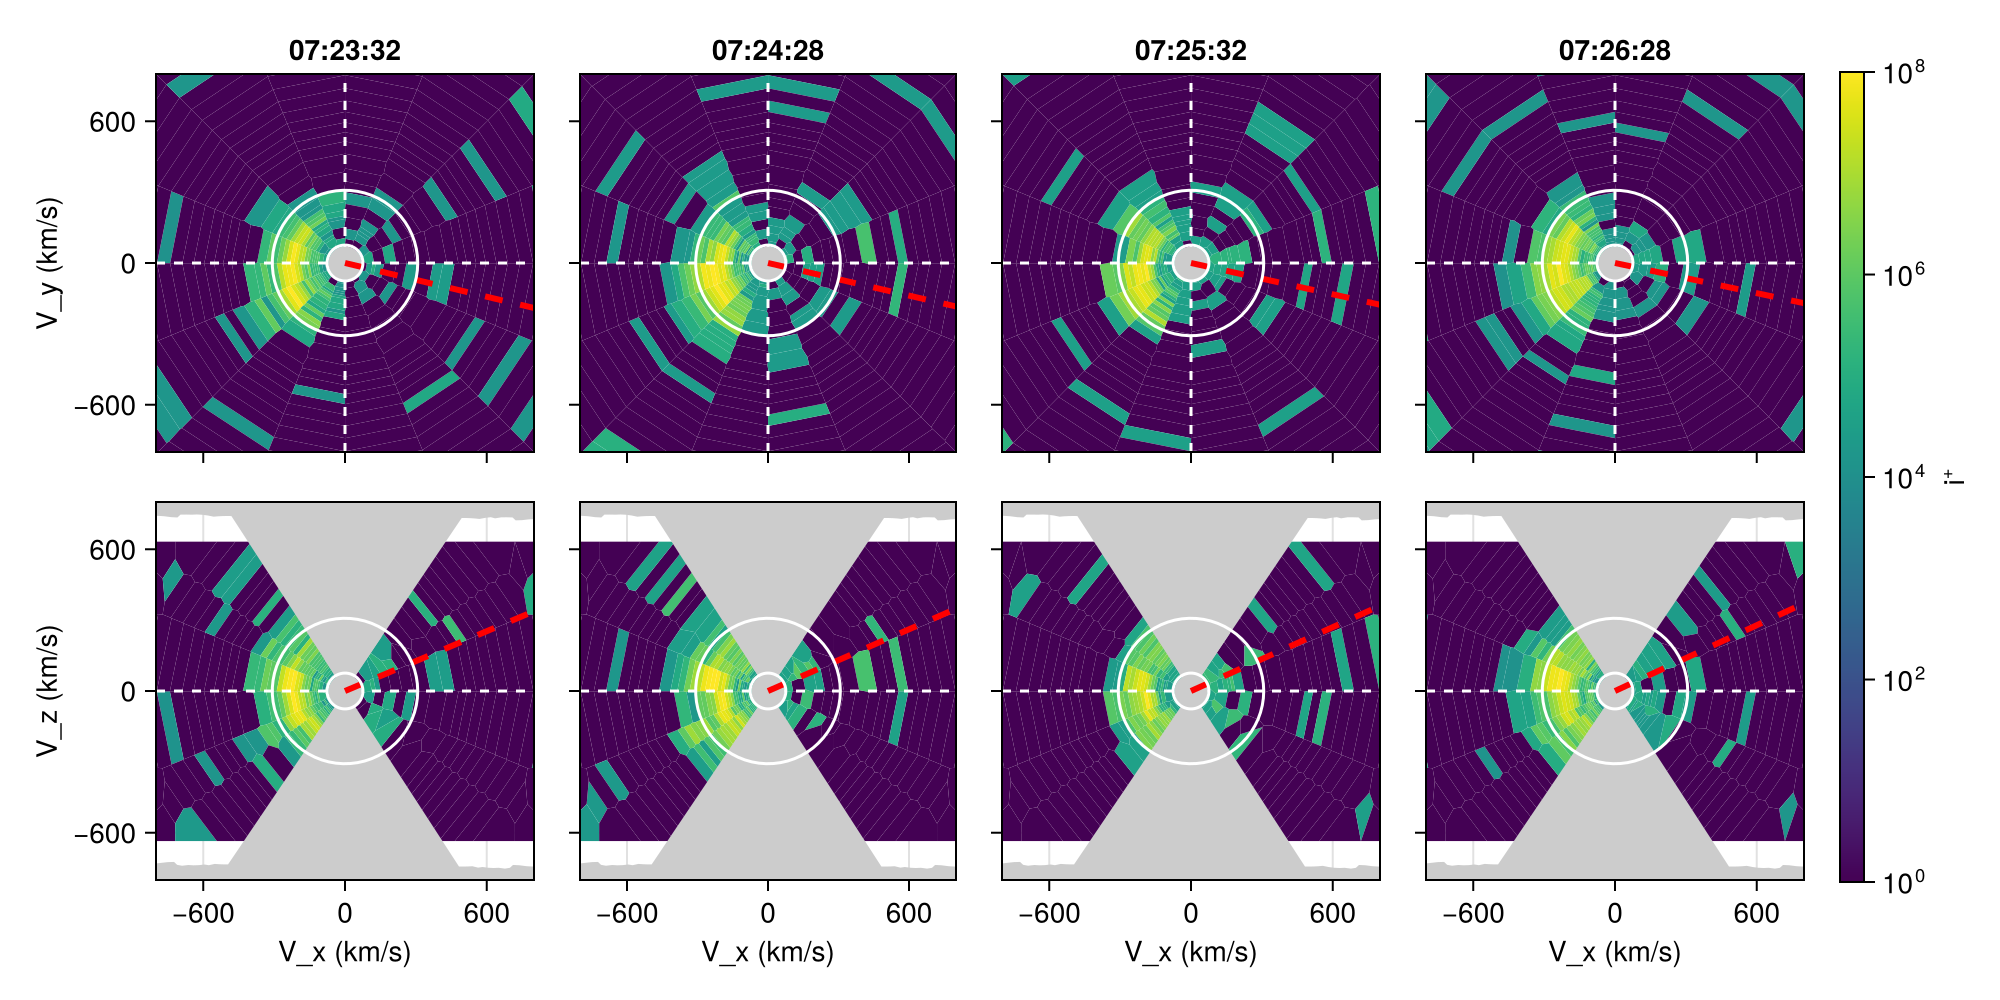

In [190]:
yyyy = 2021
mm = 08
dd = 24
mi = 23
ss = 30

time_stemp = [
    DateTime(yyyy, mm, dd, 07, mi, ss),
    DateTime(yyyy, mm, dd, 07, mi+1, ss),
    DateTime(yyyy, mm, dd, 07, mi+2, ss),
    DateTime(yyyy, mm, dd, 07, mi+3, ss),
];

data_path = joinpath(pwd(), "..", "..", "Data", "MAVEN", "mvn_swi_l2_coarsearc3d_20210824_v02_r00.cdf")
data = load_cdf(data_path)
quat_path = joinpath(pwd(), "..", "..", "Data", "MAVEN", "mvn_spice_swia_qu_20210824.csv")
quat_data = load_quat(quat_path)
quat_data[:data_load_flag] = true
swi_data = get_3dc!(data, quat_data = quat_data)
mag_path = joinpath(pwd(), "..", "..", "Data", "MAVEN", "mvn_mag_l3_2021236ss1s_20210824_v01_r01.f77_unformatted")
mag_data = load_mag_l3(mag_path)
time_b = mag_data[:epoch]
B_ss = mag_data[:B]
position_mso = mag_data[:position]

fig_VDF = Figure(resolution = (1000, 500))

df_unit = ["(cm",superscript("-2")," s",superscript("-1")," sr",superscript("-1"),")"]

spice = Dict(
    :mass_range => [0, 2],
    :m_int => 1,
)

colorrange = (1e0, 1e8)
spice_name = "H+"
X_vdf_label = "V_x (km/s)"
Y_vdf_label = "V_y (km/s)"
Z_vdf_label = "V_z (km/s)"
V_30ev = MAVEN_STATIC.ion_energy2v(30, spice[:m_int]) / 1000
V_494ev = MAVEN_STATIC.ion_energy2v(494, spice[:m_int]) / 1000

for II in eachindex(time_stemp)
    plot_range = (-800, 800)
    ticks = [-600, 0, 600]
    println("Doing $(time_stemp[II]) $spice_name")
    _, time_ind = findmin(d -> abs(d - time_stemp[II]), swi_data[:epoch])
    swi_time = swi_data[:epoch][time_ind]

    _, rotation_ind = findmin(d -> abs(d - swi_time), quat_data[:epoch])
    local rotation_Q = quat_data[:quat][rotation_ind]

    _, time_b_ind = findmin(d -> abs(d - swi_time), time_b)
    local vsc = (position_mso[time_b_ind+1, :] .- position_mso[time_b_ind-1, :]) ./ (datetime2unix(time_b[time_b_ind+1]) - datetime2unix(time_b[time_b_ind-1]))
    #vsc = MAVEN_STATIC.rotate_vector_with_Matrix(vsc,rotation_Q)
    local p0 = position_mso[time_b_ind, :]
    #p0 = MAVEN_STATIC.rotate_vector_with_Matrix(p0,rotation_Q)
    
    b0 = B_ss[time_b_ind, :]
    #b0 = MAVEN_STATIC.rotate_vector_with_Matrix(b0,rotation_Q)

    vel, _, den = MAVEN_SWIA.v_3d(swi_data,time_ind;energy_range=[494,1e8])
    vel =vel[1,:] .+ vsc

    local energy = reshape(swi_data[:energy],1,1,48)
    local theta  = reshape(swi_data[:theta][time_ind,:,:],1,4,48)
    local phi    = reshape(swi_data[:phi],16,1,1)
    v0 = MAVEN_SWIA.ion_energy2v.(energy,1)./1000
    vv = vec(MAVEN_SWIA.sphere2xyz_for_SWIA.(v0,theta,phi))
    v = hcat([x[1] for x in vv],[x[2] for x in vv],[x[3] for x in vv])

    dF = vec(swi_data[:diff_en_fluxes][time_ind,:,:,:]) .* 1e-3 # IS化

    keys_range = [
        :energy,:denergy,:theta,:dtheta,:phi,:dphi,
    ]
    shape_matrix = ones(16,4,48)
    local range_data =Dict(
        :shape => ones(size(swi_data[:diff_en_fluxes][time_ind,:,:,:])),
        :mode => "swi",
        :m_int => spice[:m_int],
        :energy => energy.*shape_matrix,
        :denergy => reshape(swi_data[:denergy],1,1,48).*shape_matrix,
        :theta => theta.*shape_matrix,
        :dtheta => reshape(swi_data[:dtheta][time_ind,:,:],1,4,48).*shape_matrix,
        :phi => reshape(phi,16,1,1).*shape_matrix,
        :dphi => swi_data[:dphi].*shape_matrix,
    )
    for i in keys_range
        range_data[i] = reshape(range_data[i],16*4*48)
    end

    title = Dates.format(swi_time, "HH:MM:SS")
    ax2 = Axis(fig_VDF[1, II], title=title, aspect=1, yticks=ticks, xticks=ticks, alignmode=Inside())
    hidexdecorations!(ax2, grid=false, ticks=false)
    ax3 = Axis(fig_VDF[2, II], aspect=1, yticks=ticks, xticks=ticks, alignmode=Inside())
    linkxaxes!(ax2, ax3)
    ax2, rot2, ind_mask = MAVEN_plot.VDF_2d_slip(
        ax2,v,dF; 
        normal_vectors = [[1,0,0],[0,1,0]],  
        # normal_vectors=MAVEN_STATIC.rotate_vector_with_Matrix.([[1,0,0],[0,1,0]],rotation_Q), 
        colorrange=colorrange, vbluk=vel, plot_range=plot_range, 
        vsc=vsc,magf=b0,return_rot_matrix=true, angle_range=[-30, 30])
    local masked_range_data = Dict(
        :shape => ones(size(swi_data[:diff_en_fluxes][time_ind,:,:,:])),
        :mode => "swi",
        :m_int => spice[:m_int],
    )
    for i in keys_range
        masked_range_data[i] = range_data[i][ind_mask]
    end
    ax2 = MAVEN_plot.VDF_2d_mask(ax2,masked_range_data;rot = rot2, vsc=vsc)

    ax3, rot3, ind_mask = MAVEN_plot.VDF_2d_slip(
        ax3,v,dF; 
        normal_vectors = [[1,0,0],[0,0,1]], 
        # normal_vectors=MAVEN_STATIC.rotate_vector_with_Matrix.([[1,0,0],[0,0,1]],rotation_Q), 
        colorrange=colorrange, vbluk=vel, plot_range=plot_range, 
        vsc=vsc,magf=b0, return_rot_matrix=true, angle_range=[-30, 30],xlabel=X_vdf_label)
    local masked_range_data = Dict(
        :shape => ones(size(swi_data[:diff_en_fluxes][time_ind,:,:,:])),
        :mode => "swi",
        :m_int => spice[:m_int],
    )
    for i in keys_range
        masked_range_data[i] = range_data[i][ind_mask]
    end
    ax3 = MAVEN_plot.VDF_2d_mask(ax3,masked_range_data;rot = rot3, vsc=vsc)

    for i in 1:2
        rott = [rot2, rot3][i]
        ax = [ax2, ax3][i]
        xx = -p0
        xx = rott * xx * 100
        lines!(ax, [0, xx[1]], [0, xx[2]], color=:red, linewidth=3, linestyle=:dash) # 火星方向
        # bb = rott * b0 * 100
        vel_local = rott * vel
        # scatter!(ax, vel_local[1], vel_local[2], color=:white, markersize=15, marker='X') # 速度矢量
        # lines!(ax, [0, bb[1]], [0, bb[2]], color=:white, linewidth=3, linestyle=:dash)
        lines!(ax, Circle(Point2f(0, 0), V_30ev), color=:white) # 30eV的能量圈
        lines!(ax, Circle(Point2f(0, 0), V_494ev), color=:white) 
        # arrows!(ax, [Point2f(0, 0)],[Vec2f(vel_local[1],vel_local[2])]; 
        #     color=:blue,arrowsize=15,arrowtail=15,linewidth=3,align = :endpoint) # 速度矢量arrowtail
    end
    if II == 1
        # ax1.ylabel = Y_label
        ax2.ylabel = Y_vdf_label
        ax3.ylabel = Z_vdf_label
    else
        # hideydecorations!(ax1, grid=false, ticks=false)
        hideydecorations!(ax2, grid=false, ticks=false)
        hideydecorations!(ax3, grid=false, ticks=false)
    end
end

Colorbar(fig_VDF[1:2, 5], limits=colorrange, label=rich("i",superscript("+")), 
    colormap=:viridis, scale=log10)

display(fig_VDF)
save("MAVEN_SWIA_Ion_VDF_2D_$(replace(string(time_stemp[1]), ":" => "-")).png", fig_VDF)

In [188]:
save("MAVEN_SWIA_Ion_VDF_2D_$(replace(string(time_stemp[1]), ":" => "-")).png", fig_VDF)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\USTC\.julia\packages\Makie\Vn16E\src\scenes.jl:264
┌ Warning: There were duplicate points. Only one of each duplicate will be used, and all other duplicates will be skipped. The indices of the duplicates are:
│   (-1067.8566f0, 212.40988f0) at indices [133, 291]
│ To suppress this warning, call `DelaunayTriangulation.toggle_warn_on_dupes!()`.
└ @ DelaunayTriangulation C:\Users\USTC\.julia\packages\DelaunayTriangulation\z6I4Z\src\algorithms\triangulation\check_args.jl:122


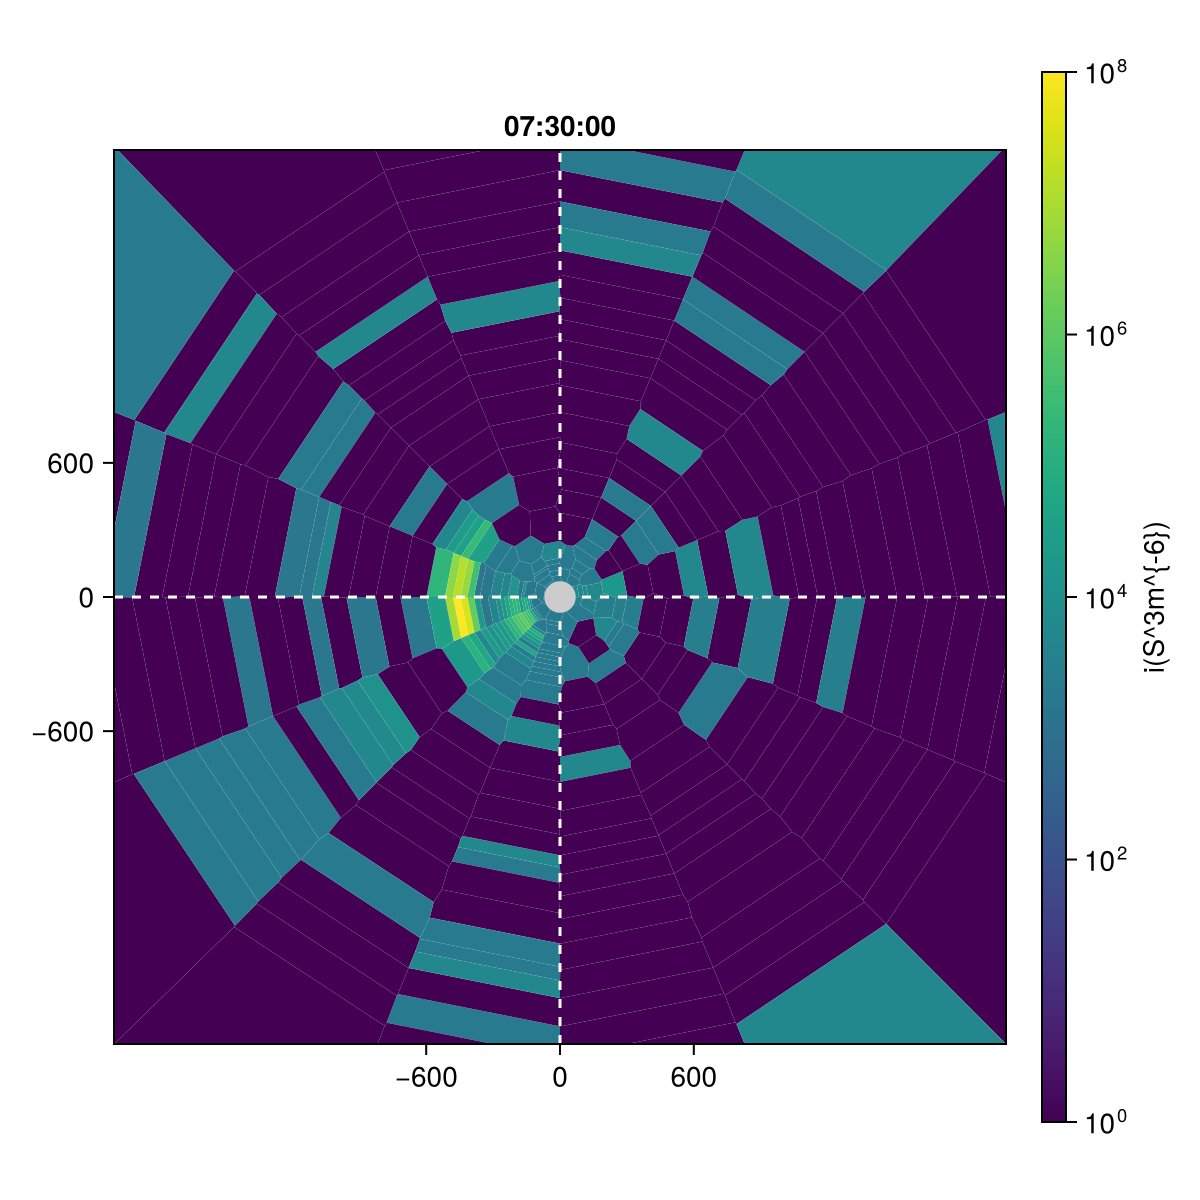

CairoMakie.Screen{IMAGE}


In [174]:
# 绘制二维速度饼状图
fig = Figure(resolution = (600, 600))
title = Dates.format(target_dt, "HH:MM:SS")
plot_range = (-2000, 2000)
ticks = [-600, 0, 600]
colorrange = (1e0, 1e8)
ax = Axis(fig[1, 1], 
        title = title, 
        aspect=1, yticks=ticks, xticks=ticks, alignmode=Inside(), 
        xlabel = "Vx (km/s)", ylabel = "Vy (km/s)")

ax = MAVEN_plot.VDF_2d_slip(ax, v, dF, plot_range=plot_range, colorrange=colorrange)
Colorbar(fig[1, 2], limits=colorrange, 
    label=rich("i(S^3m^{-6})"), colormap=:viridis, scale=log10)

display(fig)

In [66]:
save("test.png", fig)

In [51]:
target_time_str = "2021-08-24T07:30:00"
target_dt = DateTime(target_time_str, dateformat"yyyy-mm-ddTHH:MM:SS")
target_val, target_idx = findmin(d -> abs(d - target_dt), data[:epoch])
vlist, fluxlist, denlist = v_3d(data, target_idx-10:target_idx+10)
fig = Figure(resolution=(600, 600))
ax = Axis(fig[1, 1], 
          xlabel="xlabel",
          ylabel="ylabel")

dataList = data[:diff_en_fluxes][ target_idx-10:target_idx+10, :, :, :]
VDF_2d_slip(ax, vlist, dataList)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\USTC\.julia\packages\Makie\Vn16E\src\scenes.jl:264


LoadError: DimensionMismatch: mismatch in dimension 1 (expected 21 got 64512)

In [ ]:
# 时间范围设置
target_time_str = "2021-08-24T07:30:00"
start_time_str = "2021-08-24T06:00:00"
end_time_str = "2021-08-24T09:00:00"

# 将目标时间字符串解析为 DateTime 对象
target_dt = DateTime(target_time_str, dateformat"yyyy-mm-ddTHH:MM:SS")
start_dt = DateTime(start_time_str, dateformat"yyyy-mm-ddTHH:MM:SS")
end_dt = DateTime(end_time_str, dateformat"yyyy-mm-ddTHH:MM:SS")

# 数据处理
flux_4d = data["diff_en_fluxes"] # 维度: [Phi, Theta, Energy, Time]
energies = data["energy_coarse"][:]./1000 # 维度: [Energy]
epochs = data["epoch"][:]           # 维度: [Time] (需确保转换为 DateTime)
times_dates = DateTime.(epochs)  # 将 CDF 时间转换为 DateTime 对象数组

# 找到最接近的时间索引
target_val, target_idx = findmin(d -> abs(d - target_dt), times_dates)
start_val, start_idx = findmin(d -> abs(d - start_dt), times_dates)
end_val, end_idx = findmin(d -> abs(d - end_dt), times_dates)

# 降维处理
# 对角度维度求平均，得到 [Energy, Time]
flux_2d = dropdims(mean(flux_4d, dims=(1,2)), dims=(1,2))
# 转置为 [Time, Energy] 以适配 Makie
flux_final = flux_2d' 

# 激活CairoMakie
CairoMakie.activate!()

# 提取时间范围和通量数据
time_range = times_dates[start_idx:end_idx]
time_numeric = [datetime2unix(dt) for dt in time_range]
flux_at_target = flux_final[start_idx:end_idx, :]./1000

# 创建图形
fig = Figure(resolution=(1000, 600))
ax = Axis(fig[1, 1], 
          xlabel="Time (UTC)",
          ylabel="Energy (keV)")

# 创建热图
hm = heatmap!(ax, time_numeric, energies, flux_at_target, colormap=:viridis)

# 添加颜色条
Colorbar(fig[1, 2], hm; 
        label="Differential Energy Flux\neV/(cm2 s sr eV)", 
        width=20,
        ticks=LinearTicks(6),
        ticklabelalign=(:left, :center))

# 创建30分钟间隔的刻度
tick_times = start_dt:Dates.Minute(30):end_dt

# 将刻度时间转换为数值
tick_positions = [datetime2unix(t) for t in tick_times]

# 格式化刻度标签 (使用HH:MM格式)
tick_labels = Dates.format.(tick_times, "HH:MM")

# 设置刻度
ax.xticks = (tick_positions, tick_labels)

# 可选：旋转刻度标签以避免重叠
# ax.xticklabelrotation = π/6  # 30度旋转
# ax.xticklabelalign = (:right, :center)

# 设置y轴为对数刻度（如果能量范围很大）
ax.yscale = log10
ax.ylabel = "Energy (keV) [log scale]"

# 可选：添加网格线
ax.xgridvisible = true
ax.ygridvisible = true
ax.xgridstyle = :dash
ax.ygridstyle = :dash
ax.xgridcolor = (:gray, 0.2)
ax.ygridcolor = (:gray, 0.2)

# 保存图形
save("MAVEN_i_flux_heatmap_30min.png", fig, resolution=(1200, 800))

In [ ]:
xd = start_dt .+ Dates.Minute.(30) .* range(0, 6)

In [ ]:
using CairoMakie
CairoMakie.activate!()
time_range = times_dates[start_idx: end_idx]
time_numeric = [datetime2unix(dt) for dt in time_range]
flux_at_target = flux_final[start_idx: end_idx, :]./1000
fig = Figure()
ax = Axis(fig[1, 1])
hm = heatmap!(ax, time_numeric, energies, flux_at_target)
Colorbar(fig[1, 2], hm; label = "Differential Energy Flux (cm² s sr keV)⁻¹", width = 15)
xticks_pos = range(extrema(time_range)..., length=6)
# ax6.xticks = (xtk, Dates.format.(xd, "HH:MM"))
ax.xticks = (time_numeric, Dates.format.(time_range, "HH:MM"))
save("MAVEN_i_flux_heatmap.png", fig)

In [ ]:
flux_at_target = flux_final[start_idx: end_idx, :]./1000